# Micro-compression Contact Point Finder

## Last Updated: August 6, 2020

This document was prepared by Leah Ginsberg, a member of the [Ravichandran Research Group](https://www.ravi.caltech.edu/) at [Caltech](http://www.caltech.edu) in collaboration with [Professor Eleftheria Roumeli](https://sites.google.com/uw.edu/roumeli-research-group/) from [University of Washington](https://www.washington.edu/). 

In [1]:
import numpy as np               # general math operations
import pandas as pd              # pandas dataframes
import altair as alt             # pretty plotting

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

From Routier-Kierzkowska et al.: "For each measurement cycle, the force signal is offset, so that the mean force signal before the contact point is equal to zero. The contact point is then determined to be the closest point to the maximal indentation that is below a user-defined contact force threshold (usually smaller than 1 $\mu$N). Both force offsetting and contact point detection are performed iteratively, using finer and finer threshold values. Indentation depth is then given by the sensor position corrected for sensor deflection) minus the contact point position." 

In [2]:
# Name of file with corrected micro-compression experimental data
fileName = 'cycling_tests/in_water/cell132D_corr'
# read data from file to dataframe
df = pd.read_csv(fileName, header=1, sep='\t', names=['Index', 'Time (s)', 'Displacement (um)', 'Pos X (um)', 'Pos Y (um)', 'Pos Z (um)', 'Force A (uN)', 'Force B (uN)', 'fileName', 'indenting', 'Dex', 'treatment', 'Corrected Displacement (um)'])
# Take a look
df.head()

,Index,Time (s),Displacement (um),Pos X (um),Pos Y (um),Pos Z (um),Force A (uN),Force B (uN),fileName,indenting,Dex,treatment,Corrected Displacement (um)
1,1.001,0.218,0.07000,-204.13425,83.99000,-426.75100,-14.45649,-0.00292,cycling_tests/in_water/cell132D,True,False,NaN,0.126810
2,1.001,0.334,0.09000,-204.13375,83.99000,-426.77100,-14.46126,-0.01135,cycling_tests/in_water/cell132D,True,False,NaN,0.146829
3,1.001,0.437,0.11100,-204.13375,83.99050,-426.79200,-14.32922,-0.00530,cycling_tests/in_water/cell132D,True,False,NaN,0.167310
4,1.001,0.555,0.13675,-204.13425,83.99000,-426.81775,-14.01580,-0.00960,cycling_tests/in_water/cell132D,True,False,NaN,0.191829
5,1.001,0.671,0.16350,-204.13400,83.99075,-426.84450,-13.79626,-0.00467,cycling_tests/in_water/cell132D,True,False,NaN,0.217716


Now, that we have the data, let's start the thresholding process.

In [3]:
df.insert(13,'offset force A (uN)', df['Force A (uN)'],False) # initialize offset force column

Contact point found at Z_corr=8.075774939374684


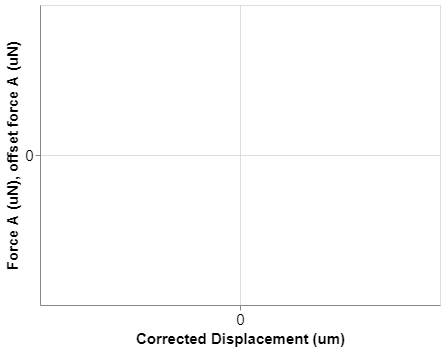

In [4]:
threshold = 20                                   # start with a high force threshold (this value can be changed to any number >=20)
df_indenting = df[df['indenting']]               # only concerned with indentation data
df_precontact = df_indenting[df_indenting['offset force A (uN)']<threshold]    # define all data below threshold as 'precontact'
force_offset = np.mean(df_precontact['offset force A (uN)'])                   # force offset is mean of precontact data (so that new mean of precontact data is zero)
df.loc[:, 'offset force A (uN)'] = df['offset force A (uN)'] - force_offset    # write new offset force on dataframe

# Find the contact point (which is currently defined as the point where the force data crosses the threshold of 20 uN)
contact_point20 = max(df_indenting[df_indenting['offset force A (uN)']<threshold]['Corrected Displacement (um)'])
print('Contact point found at Z_corr=' + str(contact_point20))

# Let's see what we've done so far
orig_chart = alt.Chart(df[df['indenting']]).mark_circle().encode(
    x='Corrected Displacement (um)',
    y='Force A (uN)',
    color=alt.value('black')
)
offset20_chart = alt.Chart(df[df['indenting']]).mark_square().encode(
    x='Corrected Displacement (um)',
    y='offset force A (uN)',
    color=alt.value('blue')
)
(orig_chart+offset20_chart).configure_axis(grid=True,
    labelFontSize=15,
    titleFontSize=15)

In [5]:
threshold = 20                                   # start with a high force threshold (this value can be changed to any number >=20)
df_indenting = df[df['indenting']]               # only concerned with indentation data
df_precontact = df_indenting[df_indenting['offset force A (uN)']<threshold] 
df_precontact

,Index,Time (s),Displacement (um),Pos X (um),Pos Y (um),Pos Z (um),Force A (uN),Force B (uN),fileName,indenting,Dex,treatment,Corrected Displacement (um),offset force A (uN)
1,1.001,0.218,0.07000,-204.13425,83.99000,-426.75100,-14.45649,-0.00292,cycling_tests/in_water/cell132D,True,False,NaN,0.126810,-3.895194
2,1.001,0.334,0.09000,-204.13375,83.99000,-426.77100,-14.46126,-0.01135,cycling_tests/in_water/cell132D,True,False,NaN,0.146829,-3.899964
3,1.001,0.437,0.11100,-204.13375,83.99050,-426.79200,-14.32922,-0.00530,cycling_tests/in_water/cell132D,True,False,NaN,0.167310,-3.767924
4,1.001,0.555,0.13675,-204.13425,83.99000,-426.81775,-14.01580,-0.00960,cycling_tests/in_water/cell132D,True,False,NaN,0.191829,-3.454504
5,1.001,0.671,0.16350,-204.13400,83.99075,-426.84450,-13.79626,-0.00467,cycling_tests/in_water/cell132D,True,False,NaN,0.217716,-3.234964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1.001,16.017,7.30550,-204.13400,83.99000,-433.98650,3.64029,-0.00451,cycling_tests/in_water/cell132D,True,False,NaN,7.291195,14.201586
149,1.001,16.132,7.35525,-204.13450,83.99025,-434.03625,4.67121,-0.00928,cycling_tests/in_water/cell132D,True,False,NaN,7.336893,15.232506
150,1.001,16.245,7.40700,-204.13500,83.99000,-434.08800,6.01236,-0.00435,cycling_tests/in_water/cell132D,True,False,NaN,7.383373,16.573656
151,1.001,16.351,7.45125,-204.13375,83.99075,-434.13225,7.26601,-0.00451,cycling_tests/in_water/cell132D,True,False,NaN,7.422696,17.827306


Our data has been offset so that the average force until the contact point (which is currently defined as the point where the force data crosses the threshold of 20 uN) is zero. Currently, that contact point is obviously far into the indentation, but we will refine this point in later steps.

Also, we need to get rid of some of the initial data. In this example we have at least 80 um of precontact data. The force in this precontact data is gradually increasing as the tip displaces the water or sorbitol above the cell in its approach. To force the average of this precontact data to be zero will require a large force offset that will skew the final result. Also, all of our data does not have this large of an approach, so we want to make sure our offset for each data set is consistent. To do this, let's just remove all the precontact data more than 20 um from the contact point. All of our data sets have at least this much precontact data.

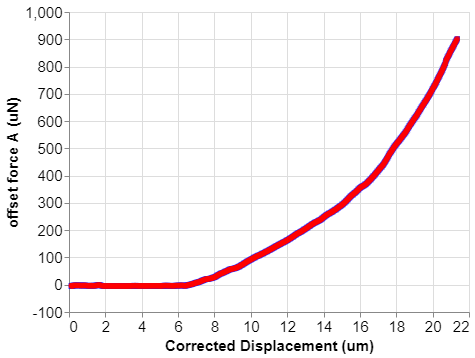

In [6]:
if contact_point20>50:
    df = df[df['Corrected Displacement (um)']>contact_point20-50]
    df.loc[:,'Corrected Displacement (um)'] = df['Corrected Displacement (um)']-(contact_point20-50)
    
    # Update contact point
    contact_point20 = 50
    
# Let's see what we did
disp_chart = alt.Chart(df[df['indenting']]).mark_circle().encode(
    x='Corrected Displacement (um)',
    y='offset force A (uN)',
    color=alt.value('red')
)

(offset20_chart + disp_chart).configure_axis(grid=True,
    labelFontSize=15,
    titleFontSize=15)

Finally, let's save the corrected displacement with the contact point subtracted as the indentation depth.

In [7]:
df.loc[:,'indentation depth (um)'] = df['Corrected Displacement (um)'] - contact_point20
# save chart from this iteration
offset20_chart = alt.Chart(df[df['indenting']]).mark_circle().encode(
    x='indentation depth (um)',
    y='offset force A (uN)',
    color=alt.value('blue')
)

This is the end of one loop. In the next loop, we'll use a smaller threshold to start refining the location of the contact point.

Contact point found at Z_corr=7.108019088852854


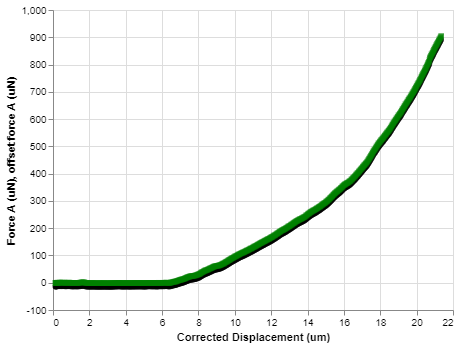

In [8]:
threshold = 10                                   # force threshold (this value can be changed to any number <20 and >=10)
df_indenting = df[df['indenting']]               # only concerned with indentation data
df_precontact = df_indenting[df_indenting['offset force A (uN)']<threshold]    # define all data below threshold as 'precontact'
force_offset = np.mean(df_precontact['offset force A (uN)'])                   # force offset is mean of precontact data (so that new mean of precontact data is zero)
df.loc[:, 'offset force A (uN)'] = df['offset force A (uN)'] - force_offset    # write new offset force on dataframe

# Find the contact point (which is currently defined as the point where the force data crosses the threshold of 10 uN)
contact_point10 = max(df_indenting[df_indenting['offset force A (uN)']<threshold]['Corrected Displacement (um)'])
print('Contact point found at Z_corr=' + str(contact_point10))

# Let's see what we've done so far
prev_chart = alt.Chart(df[df['indenting']]).mark_circle().encode(
    x='Corrected Displacement (um)',
    y='Force A (uN)',
    color=alt.value('black')
)
offset10_chart = alt.Chart(df[df['indenting']]).mark_square().encode(
    x='Corrected Displacement (um)',
    y='offset force A (uN)',
    color=alt.value('green')
)
prev_chart+offset10_chart

Again, our data has been offset so that the average force until the contact point (which is currently defined as the point where the force data crosses the threshold of 10 uN) is zero. Now that contact point is much closer to a believable true contact point, and we will continue to refine this point in later steps.

Our contact point is now less than 20um, so we will not remove any more data. In the final loop, we will leave the `if` statement as a check in every loop, but we do not need to include the line here since we can see that the check would fail anyway. So, all that is left to do for this iteration is save the corrected displacement with the contact point subtracted as the indentation depth, and save the results in the original dataframe we were working with, `df_sample`

In [9]:
df.loc[:,'indentation depth (um)'] = df['Corrected Displacement (um)'] - contact_point10
# save indentation data from this iteration
offset10_chart = alt.Chart(df[df['indenting']]).mark_circle().encode(
    x='indentation depth (um)',
    y='offset force A (uN)',
    color=alt.value('green')
)

Let's start the next loop. The threshold this time will be 5 uN.

Contact point found at Z_corr=6.738453634097192


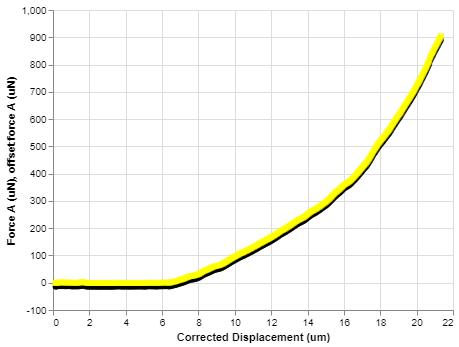

In [10]:
threshold = 5                                   # force threshold (this value can be changed to any number <10 and >=5)
df_indenting = df[df['indenting']]               # only concerned with indentation data
df_precontact = df_indenting[df_indenting['offset force A (uN)']<threshold]    # define all data below threshold as 'precontact'
force_offset = np.mean(df_precontact['offset force A (uN)'])                   # force offset is mean of precontact data (so that new mean of precontact data is zero)
df.loc[:, 'offset force A (uN)'] = df['offset force A (uN)'] - force_offset    # write new offset force on dataframe

# Find the contact point (which is currently defined as the point where the force data crosses the threshold of 5 uN)
contact_point5 = max(df_indenting[df_indenting['offset force A (uN)']<threshold]['Corrected Displacement (um)'])
print('Contact point found at Z_corr=' + str(contact_point5))

# Let's see what we've done so far
prev_chart = alt.Chart(df[df['indenting']]).mark_circle().encode(
    x='Corrected Displacement (um)',
    y='Force A (uN)',
    color=alt.value('black')
)
offset5_chart = alt.Chart(df[df['indenting']]).mark_square().encode(
    x='Corrected Displacement (um)',
    y='offset force A (uN)',
    color=alt.value('yellow')
)
prev_chart+offset5_chart

Again, our data has been offset so that the average force until the contact point (which is currently defined as the point where the force data crosses the threshold of 5 uN) is zero. The contact point changed much less this time ($Z_\text{corrected}$ = 10 um), so we will refine this point just one more time.

Let's save the corrected displacement with the contact point subtracted as the indentation depth, and save the results in the original dataframe we were working with, `df_sample`, and move on to the final iteration.

In [11]:
df.loc[:,'indentation depth (um)'] = df['Corrected Displacement (um)'] - contact_point5
# save indentation data from this iteration
offset5_chart = alt.Chart(df[df['indenting']]).mark_circle().encode(
    x='indentation depth (um)',
    y='offset force A (uN)',
    color=alt.value('yellow')
)

The threshold this time will be 1 uN.

Contact point found at Z_corr=6.5475197662769675


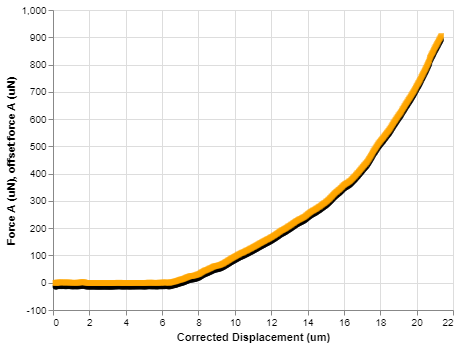

In [12]:
threshold = 3.0                                  # force threshold (this value can be changed to any number >=1 and <5)
df_indenting = df[df['indenting']]               # only concerned with indentation data
df_precontact = df_indenting[df_indenting['offset force A (uN)']<threshold]    # define all data below threshold as 'precontact'
df_postcontact = df_indenting[df_indenting['offset force A (uN)']>=threshold]  # define all data above threshold as 'postcontact'
force_offset = np.mean(df_precontact['offset force A (uN)'])                   # force offset is mean of precontact data (so that new mean of precontact data is zero)
df.loc[:, 'offset force A (uN)'] = df['offset force A (uN)'] - force_offset    # write new offset force on dataframe

# Find the contact point (which is currently defined as the point where the force data crosses the threshold of 1 uN)
contact_point1 = max(df_indenting[df_indenting['offset force A (uN)']<threshold]['Corrected Displacement (um)'])
print('Contact point found at Z_corr=' + str(contact_point1))

# Let's see what we've done so far
prev_chart = alt.Chart(df[df['indenting']]).mark_circle().encode(
    x='Corrected Displacement (um)',
    y='Force A (uN)',
    color=alt.value('black')
)
offset1_chart = alt.Chart(df[df['indenting']]).mark_square().encode(
    x='Corrected Displacement (um)',
    y='offset force A (uN)',
    color=alt.value('orange')
)
prev_chart+offset1_chart

Let's save the final results, and then look at the data with each threshold all together.

In [13]:
df.loc[:,'indentation depth (um)'] = df['Corrected Displacement (um)'] - contact_point1
# save indentation data from this iteration
offset1_chart = alt.Chart(df[df['indenting']]).mark_circle().encode(
    x='indentation depth (um)',
    y=alt.Y('offset force A (uN)', scale=alt.Scale(domain=(-5,25))),
    color=alt.value('orange')
)

This will be the final iteration. This threshold can be any number <1 that gets closest to the contact point.

Contact point found at Z_corr=6.408616322806353


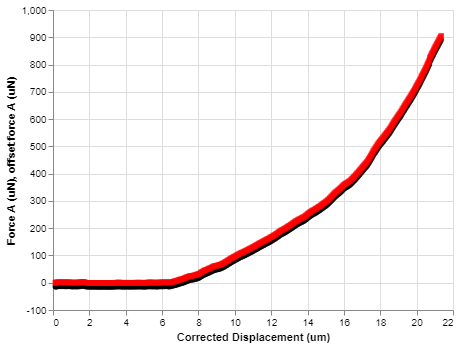

In [14]:
threshold = 0.25                                  # force threshold (this value can be changed to any number <1)
df_indenting = df[df['indenting']]               # only concerned with indentation data
df_precontact = df_indenting[df_indenting['offset force A (uN)']<threshold]    # define all data below threshold as 'precontact'
df_postcontact = df_indenting[df_indenting['offset force A (uN)']>=threshold]  # define all data above threshold as 'postcontact'
force_offset = np.mean(df_precontact['offset force A (uN)'])                   # force offset is mean of precontact data (so that new mean of precontact data is zero)
df.loc[:, 'offset force A (uN)'] = df['offset force A (uN)'] - force_offset    # write new offset force on dataframe

# Find the contact point (which is currently defined as the point where the force data crosses the threshold of 1 uN)
contact_point1 = max(df_indenting[df_indenting['offset force A (uN)']<threshold]['Corrected Displacement (um)'])
print('Contact point found at Z_corr=' + str(contact_point1))

# Let's see what we've done so far
prev_chart = alt.Chart(df[df['indenting']]).mark_circle().encode(
    x='Corrected Displacement (um)',
    y='Force A (uN)',
    color=alt.value('black')
)
offsetp5_chart = alt.Chart(df[df['indenting']]).mark_square().encode(
    x='Corrected Displacement (um)',
    y='offset force A (uN)',
    color=alt.value('red')
)
prev_chart+offsetp5_chart

Let's save the final results, and then look at the data with each threshold all together.

In [15]:
df.loc[:,'indentation depth (um)'] = df['Corrected Displacement (um)'] - contact_point1
# save indentation data from this iteration
offsetp5_chart = alt.Chart(df[df['indenting']]).mark_circle().encode(
    x='indentation depth (um)',
    y=alt.Y('offset force A (uN)', scale=alt.Scale(domain=(-5,25))),
    color=alt.value('red')
)

Let's take a look at how our algorithm progressively transformed the data with every loop.

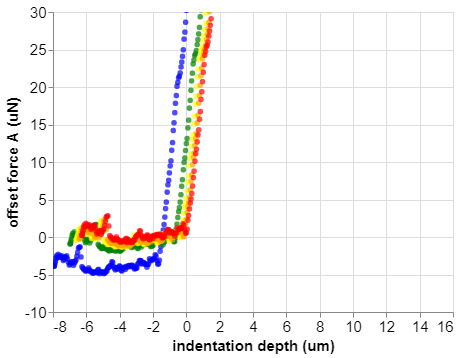

In [16]:
#    (blue)          (green)        (yellow)         (orange)          (red)
(offset20_chart + offset10_chart + offset5_chart + offset1_chart + offsetp5_chart).configure_axis(grid=True,
    labelFontSize=15,
    titleFontSize=15).interactive()

So, in this example we can see that the 1um threshold overcorrects the data, and that the contact point should be found using a threshold between 1 and 5 um. 

In [17]:
df

,Index,Time (s),Displacement (um),Pos X (um),Pos Y (um),Pos Z (um),Force A (uN),Force B (uN),fileName,indenting,Dex,treatment,Corrected Displacement (um),offset force A (uN),indentation depth (um)
1,1.001,0.218,0.07000,-204.13425,83.99000,-426.75100,-14.45649,-0.00292,cycling_tests/in_water/cell132D,True,False,NaN,0.126810,0.240137,-6.281806
2,1.001,0.334,0.09000,-204.13375,83.99000,-426.77100,-14.46126,-0.01135,cycling_tests/in_water/cell132D,True,False,NaN,0.146829,0.235367,-6.261787
3,1.001,0.437,0.11100,-204.13375,83.99050,-426.79200,-14.32922,-0.00530,cycling_tests/in_water/cell132D,True,False,NaN,0.167310,0.367407,-6.241306
4,1.001,0.555,0.13675,-204.13425,83.99000,-426.81775,-14.01580,-0.00960,cycling_tests/in_water/cell132D,True,False,NaN,0.191829,0.680827,-6.216788
5,1.001,0.671,0.16350,-204.13400,83.99075,-426.84450,-13.79626,-0.00467,cycling_tests/in_water/cell132D,True,False,NaN,0.217716,0.900367,-6.190900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2.001,97.055,4.95950,-204.13700,83.99100,-431.64050,-16.59469,-0.01358,cycling_tests/in_water/cell132D,False,False,NaN,5.024713,-1.898063,-1.383903
907,2.001,97.171,4.90900,-204.13575,83.99025,-431.59000,-16.40856,-0.00276,cycling_tests/in_water/cell132D,False,False,NaN,4.973482,-1.711933,-1.435135
908,2.001,97.269,4.85800,-204.13625,83.99075,-431.53900,-16.43560,0.00313,cycling_tests/in_water/cell132D,False,False,NaN,4.922588,-1.738973,-1.486028
909,2.001,97.369,4.80650,-204.13650,83.99025,-431.48750,-16.41174,0.00281,cycling_tests/in_water/cell132D,False,False,NaN,4.870994,-1.715113,-1.537622


# Computing Environment

In [18]:
%load_ext watermark

In [19]:
%watermark -v -p numpy,pandas,altair,jupyterlab

CPython 3.7.6
IPython 7.15.0

numpy 1.18.1
pandas 1.0.4
altair 3.3.0
jupyterlab 2.1.4
